# Линейные модели в машинном обучении. Прогнозирование удоя и вкуса молока коров для принятия решения об их покупке.

**Краткая информация о проекте:**

В проекте проводится прогнозирование удоя коров и вкуса их молока с помощью предварительно обученных  линейных моделей машинного обучения (линейная и логистическая регрессия).В процессе выполения проекта проводится:
- Знакомство и предобработка данных;
- Исследовательский анализ данных (описание и визуализация);
- Корреляционный анализ (количественных и качественных признаков);
- Обучение модели линейной регрессии на предварительных данных для прогнозирования удоя коров;
- Обучение модели логистической регрессии на предварительных данных для прогнозирования вкуса молока коров;
- Прогнозирование удоя и вкуса молока на итоговых данных;
- Формирование рекомендаций отбора коров для покупки с учетом прогнозных данных и необходимых критериев.

**План работы:**
 1. Провести загрузку данных и знакомство с ними;
 2. Провести предобработку данных;
 3. Провести исследовательских анализ данных (описание и визуализацию);
 4. Провести корреляционный анализ (количественных и качественных признаков);
 5. Провести обучение модели линейной регрессии с дальнейшим прогнозированием удоя молока на итоговых данных;
 6. Провести обучение модели логистической регрессии с дальнейшим прогнозированием вкуса молока на итогвых данных;
 7. Провести отбор коров, рекомендуемых к покупке на основании прогнозных целевых признаков и выдвигаемых критериев.

**Цель и задачи проекта:**
- **Цель** - сформировать рекомендации для фермера по покупке коров с учетом прогнозных целевых признаков и выдвигаемых критериев.
- **Задачи:**
1. Провести загрузку данных и зкакомство с ними;
2. Предобработать данные: 
- Обработать дубликаты и пропуски;
- Привести наименования столбцов к стандартному виду.
3. Провести статистический анализ данных: 
- Рассмотреть распределение количественных и качественных признаков;
- Сделать проверку соответствия признаков молока, указанных в разных датафреймах.
4. Провести корреляционный анализ данных: 
- Определить корреляцию между количественными и качественными признаками;
- Построить графики рассеивания по различным признакам;
- Построить графики "ящик с усами" по различным признакам.
5. Провести обучение модели линейной регрессии с дальнейшим прогнозированием удоя молока на итоговых данных:
- Обучить модель линейной регрессии с неизмененными данными;
- Обучить модель линейной регрессии с измененными данными;
- Обучить модель линейной регрессии с дополненными и измененными данными;
- Провести сравнительный анализ полученных моделей;
- Определить лучшую модель линейной регрессии;
- Спрогнозировать удой коров на итоговых данных
6. Провести обучение модели логистической регрессии с дальнейшим прогнозированием вкуса молока на итогвых данных:
- Подготовить данные для модели логистической регрессии;
- Обучить модель логистической регрессии;
- Провести анализ полученной модели и задать порог предсказания с учетом выдвигаемых требований;
- Спрогнозировать вкус молока на итоговых данных.
7. Провести отбор коров, рекомендуемых к покупке на основании прогнозных целевых признаков и выдвигаемых критериев.

In [1]:
!pip install phik -q

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from phik.report import correlation_report, plot_correlation_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix)

## Загрузка данных

In [3]:
for i, path in enumerate (['ferma_main.csv', 'ferma_dad.csv', 'cow_buy.csv']):
    data_path = os.path.join(os.getcwd(), path)
    if i == 0:
        ferma_main = pd.read_csv(data_path, sep=';', decimal = ',')
    elif i == 1:
        ferma_dad = pd.read_csv(data_path, sep=';', decimal = ',')
    else:
        cow_buy = pd.read_csv(data_path, sep=';', decimal = ',')

### Предварительное ознакомление с датафреймом `ferma_main`

In [4]:
ferma_main.info()
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Приведем наименование столбцов к виду `snake_case`

In [5]:
ferma_main.columns = ['cow_id', 'milk_kg', 'stern_efu', 'stern_protein', 'stern_spr', 'cow_breed',
                     'pasture', 'cow_dad_breed', 'milk_fat', 'milk_protein', 'taste', 'cow_age']
display(ferma_main.head())

,cow_id,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


### Предварительное ознакомление с датафреймом `ferma_dad`

In [6]:
ferma_dad.info()
display(ferma_dad.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Приведем наименование столбцов к виду `snake_case`

In [7]:
ferma_dad.columns = ['cow_id', 'cow_dad_name']
display(ferma_dad.head())

,cow_id,cow_dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


### Предварительное ознакомление с датафреймом `cow_buy`

In [8]:
cow_buy.info()
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Приведем наименование столбцов к виду `snake_case`

In [9]:
cow_buy.columns = ['cow_breed', 'pasture', 'cow_dad_breed', 'cow_dad_name', 'milk_fat', 
                   'milk_protein', 'cow_age']
display(cow_buy.head())

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Вывод по разделу

- Работать предстоит с тремя датасетами размерами **634х12**, **629х2** и **20х7**;
- Исходя из размерностей датасетов: либо в первом датасете есть **дубликаты**, либо во втором датасете есть **пропуски**;
- Все столбцы во всех датасетов были приведены к корректному формату наименования;
- В датасетах присутствуют данные, которые должны относится к типу `float`, а относятся к типу `object`.

##  Предобработка данных

### Обработка датафрейма `ferma_main`

In [10]:
ferma_main.info()
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cow_id         634 non-null    int64  
 1   milk_kg        634 non-null    int64  
 2   stern_efu      634 non-null    float64
 3   stern_protein  634 non-null    int64  
 4   stern_spr      634 non-null    float64
 5   cow_breed      634 non-null    object 
 6   pasture        634 non-null    object 
 7   cow_dad_breed  634 non-null    object 
 8   milk_fat       634 non-null    float64
 9   milk_protein   634 non-null    float64
 10  taste          634 non-null    object 
 11  cow_age        634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


,cow_id,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [11]:
def comma_dot(string):
    try:
        return string.replace(',', '.')
    except:
        return string
    
columns_to_change_1 = ['stern_efu', 'stern_spr', 'milk_fat', 'milk_protein']
for column in columns_to_change_1:
    ferma_main[column] = ferma_main[column].apply(lambda x: comma_dot(x))
    ferma_main[column] = ferma_main[column].astype('float64')
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cow_id         634 non-null    int64  
 1   milk_kg        634 non-null    int64  
 2   stern_efu      634 non-null    float64
 3   stern_protein  634 non-null    int64  
 4   stern_spr      634 non-null    float64
 5   cow_breed      634 non-null    object 
 6   pasture        634 non-null    object 
 7   cow_dad_breed  634 non-null    object 
 8   milk_fat       634 non-null    float64
 9   milk_protein   634 non-null    float64
 10  taste          634 non-null    object 
 11  cow_age        634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


#### Обработка явных дубликатов

In [12]:
display('Количество явных дубликатов в датафрейме: {}'.format(ferma_main.duplicated().sum()))
display('Количество явных дубликатов в столбце cow_id: {}'.format(ferma_main['cow_id'].duplicated().sum()))
display(ferma_main[ferma_main.duplicated()])

'Количество явных дубликатов в датафрейме: 5'

'Количество явных дубликатов в столбце cow_id: 5'

,cow_id,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


В датафрейме есть 5 строк с явными дубликатами. Удалим их из таблицы.

In [13]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
display('Количество явных дубликатов в датафрейме: {}'.format(ferma_main.duplicated().sum()))
display(ferma_main.shape)

'Количество явных дубликатов в датафрейме: 0'

(629, 12)

#### Обработка неявных дубликатов

In [14]:
can_be_dupl = ['cow_breed', 'pasture', 'cow_dad_breed']
for column in can_be_dupl:
    display(ferma_main[column].value_counts())

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: cow_breed, dtype: int64

Холмистое    351
Равнинное    253
Равнинные     25
Name: pasture, dtype: int64

Соверин    311
Айдиал     240
Айдиалл     78
Name: cow_dad_breed, dtype: int64

В данных были обнаружены неявные дубликаты в столбцах `pasture` и `cow_dad_breed`. Обработаем данные дубликаты с помощью принятия одного из дублирующего названия за основное.

In [15]:
ferma_main['pasture'] = ferma_main['pasture'].replace('Равнинные', 'Равнинное')
display(ferma_main['pasture'].value_counts())
ferma_main['cow_dad_breed'] = ferma_main['cow_dad_breed'].replace('Айдиалл', 'Айдиал')
display(ferma_main['cow_dad_breed'].value_counts())

Холмистое    351
Равнинное    278
Name: pasture, dtype: int64

Айдиал     318
Соверин    311
Name: cow_dad_breed, dtype: int64

#### Обработка пропусков 

In [16]:
display(ferma_main.isna().sum())

cow_id           0
milk_kg          0
stern_efu        0
stern_protein    0
stern_spr        0
cow_breed        0
pasture          0
cow_dad_breed    0
milk_fat         0
milk_protein     0
taste            0
cow_age          0
dtype: int64

В датафрейме отсутствуют явные пропуски

#### Установление столбца `cow_id` в индекс

In [17]:
ferma_main.index = ferma_main['cow_id']
ferma_main.index.name = None
ferma_main = ferma_main.drop(columns='cow_id')

### Обратка датафрейма `ferma_dad`

In [18]:
ferma_dad.info()
display(ferma_dad.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cow_id        629 non-null    int64 
 1   cow_dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,cow_id,cow_dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Обработка дубликатов

In [19]:
display('Количество явных дубликатов в датафрейме: {}'.format(ferma_dad.duplicated().sum()))
display('Количество явных дубликатов в датафрейме: {}'.format(ferma_dad['cow_id'].duplicated().sum()))

'Количество явных дубликатов в датафрейме: 0'

'Количество явных дубликатов в датафрейме: 0'

В датафрейме отсутствуют явные дубликаты

#### Обработка пропусков

In [20]:
display(ferma_dad.isna().sum())

cow_id          0
cow_dad_name    0
dtype: int64

В датафрейме отсутствуют явные пропуски

### Обработка датафрейма `cow_buy`

In [21]:
cow_buy.info()
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cow_breed      20 non-null     object 
 1   pasture        20 non-null     object 
 2   cow_dad_breed  20 non-null     object 
 3   cow_dad_name   20 non-null     object 
 4   milk_fat       20 non-null     float64
 5   milk_protein   20 non-null     float64
 6   cow_age        20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


#### Обработка дубликатов 

In [22]:
display('Количество явных дубликатов в датафрейме: {}'.format(cow_buy.duplicated().sum()))
display(cow_buy[cow_buy.duplicated()])

'Количество явных дубликатов в датафрейме: 4'

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


В датафрейме отсутствуют явные дубликаты

#### Обработка неявных дубликатов

In [23]:
can_be_dupl = ['cow_breed', 'pasture', 'cow_dad_breed']
for column in can_be_dupl:
    display(cow_buy[column].value_counts())

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: cow_breed, dtype: int64

равнинное    11
холмистое     9
Name: pasture, dtype: int64

Соверин    12
Айдиал      8
Name: cow_dad_breed, dtype: int64

В датафрейме отсутствуют неявные дубликаты. Однако для единообразия приведем значения столбца `pasture` к виду этого же столбца в датафрейме `ferma_main`.

In [24]:
cow_buy['pasture'] = cow_buy['pasture'].replace({'равнинное': 'Равнинное', 'холмистое': 'Холмистое'})
display(cow_buy['pasture'].value_counts())

Равнинное    11
Холмистое     9
Name: pasture, dtype: int64

#### Обработка пропусков

In [25]:
display(cow_buy.isna().sum())

cow_breed        0
pasture          0
cow_dad_breed    0
cow_dad_name     0
milk_fat         0
milk_protein     0
cow_age          0
dtype: int64

В датафрейме отсутствуют явные пропуски

### Вывод по разделу

- В процессе предобработки данных в датафреймах `ferma_main` и `cow_buy` были изменены типы данных в столбцах с количественными значениями с `object` на `float64`;
- В датафрейме `ferma_main` были обнаружены и удалены 5 строк-дубликатов;
- Во всех датафреймах отсутствуют пропуски.

## Исследовательский анализ данных

### Статистический анализ данных

#### Статистический анализ признаков датафрейма `ferma_main`

In [26]:
display(ferma_main.head())

,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [27]:
numeric_columns_m = ['milk_kg', 'milk_fat', 'milk_protein', 'stern_efu', 'stern_protein', 'stern_spr']
qual_columns_m = ['cow_breed', 'pasture', 'cow_dad_breed', 'taste', 'cow_age']

Посмотрим статистические данные по количественным столбцам и построим графики boxplot

,milk_kg,milk_fat,milk_protein,stern_efu,stern_protein,stern_spr
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,3.603657,3.075671,14.543879,1923.364070,0.913116
std,1644.795489,0.168656,0.002549,1.306408,182.956251,0.032203
min,5204.000000,2.990000,3.069000,10.900000,1660.000000,0.840000
25%,5751.000000,3.590000,3.074000,13.500000,1771.000000,0.890000
50%,6133.000000,3.650000,3.076000,14.700000,1888.000000,0.930000
75%,6501.000000,3.720000,3.077000,15.600000,2062.000000,0.940000
max,45616.000000,3.750000,3.085000,16.800000,2349.000000,0.960000


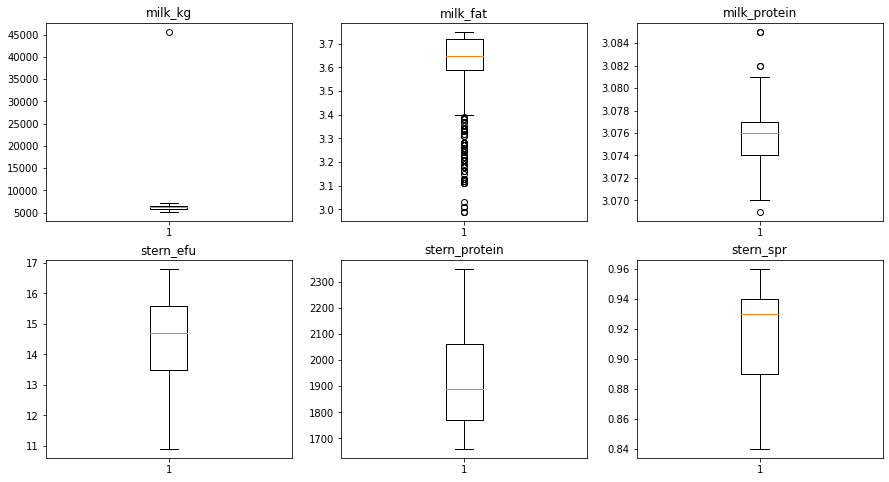

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

i, j = 0, 0
display(ferma_main[numeric_columns_m].describe())
for column in numeric_columns_m:
    ax[i, j].boxplot(ferma_main[column])
    ax[i, j].set_title(column)
    if j < 2:
        j += 1
    else: 
        i += 1
        j = 0

plt.show()

В количественных данных, связанных с характеристиками молока есть выбросы. Все они не критические, кроме выброса в столбце `milk_kg`. 

In [29]:
display(ferma_main.query('milk_kg > 8_000'))

,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Откорректируем данное значение, задав ему медианное значение столбца.

In [30]:
med = ferma_main['milk_kg'].median()
ferma_main.loc[17, 'milk_kg'] = int(med)
display(ferma_main[15:18])

,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
16,6518,15.6,1747,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.73,3.076,вкусно,более_2_лет
17,6133,11.5,1675,0.930,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет


#### Статистический анализ признаков датафрейма `cow_buy`

In [31]:
display(cow_buy.head())

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [32]:
numeric_columns_c = ['milk_fat', 'milk_protein']
qual_columns_c = ['cow_breed', 'pasture', 'cow_dad_breed', 'cow_age']

Посмотрим статистические данные по количественным столбцам и построим графики boxplot

,milk_fat,milk_protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


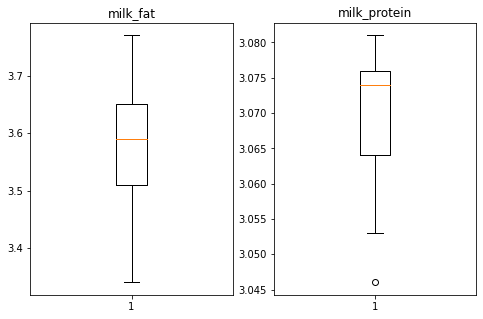

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

i = 0
display(cow_buy[numeric_columns_c].describe())
for column in numeric_columns_c:
    ax[i].boxplot(cow_buy[column])
    ax[i].set_title(column)
    i += 1

plt.show()

#### Проверка соответствия молока из двух датафреймов `ferma_main` и `cow_buy`

**Проверка процента жирности**

Н0: Среднее значение процента жирности молока в датафреймах `ferma_main` и `cow_buy` равны.

Н1: Среднее значение процента жирности молока в датафреймах `ferma_main` и `cow_buy` не равны.

In [34]:
milk_fat_main = ferma_main['milk_fat']
milk_fat_buy = cow_buy['milk_fat']
display('Среднее значение процента жирности молока в датафрейме ferma_main: {:.3f}'.format(milk_fat_main.mean()))
display('Среднее значение процента жирности молока в датафрейме cow_buy: {:.3f}'.format(milk_fat_buy.mean()))

alpha = 0.01
result = st.ttest_ind(milk_fat_main, milk_fat_buy)
display('pvalue равен: {}'.format(result.pvalue))
if result.pvalue < alpha:
    display('Молоко из ferma_main отличается от молока из cow_buy по проценту жирности')
else:
    display('Молоко из ferma_main не отличается от молока из cow_buy по проценту жирности')

'Среднее значение процента жирности молока в датафрейме ferma_main: 3.604'

'Среднее значение процента жирности молока в датафрейме cow_buy: 3.577'

'pvalue равен: 0.4921998367399104'

'Молоко из ferma_main не отличается от молока из cow_buy по проценту жирности'

**Проверка процента белка**

Н0: Среднее значение процента белка в молоке в датафреймах `ferma_main` и `cow_buy` равны.

Н1: Среднее значение процента белка в молоке в датафреймах `ferma_main` и `cow_buy` не равны.

In [35]:
milk_prot_main = ferma_main['milk_protein']
milk_prot_buy = cow_buy['milk_protein']
display('Среднее значение содержания белков в молоке в датафрейме ferma_main: {:.3f}'.format(milk_prot_main.mean()))
display('Среднее значение содержания белков в молоке в датафрейме cow_buy: {:.3f}'.format(milk_prot_buy.mean()))

alpha = 0.01
result = st.ttest_ind(milk_prot_main, milk_prot_buy)
display('pvalue равен: {}'.format(result.pvalue))
if result.pvalue < alpha:
    display('Молоко из ferma_main отличается от молока из cow_buy по проценту содержания белков')
else:
    display('Молоко из ferma_main не отличается от молока из cow_buy по проценту содержания белков')

'Среднее значение содержания белков в молоке в датафрейме ferma_main: 3.076'

'Среднее значение содержания белков в молоке в датафрейме cow_buy: 3.070'

'pvalue равен: 9.039255521845938e-18'

'Молоко из ferma_main отличается от молока из cow_buy по проценту содержания белков'

### Визуализация данных

#### Визуализация данных датафрейма `ferma_main`

**Визуализация количественных значений**

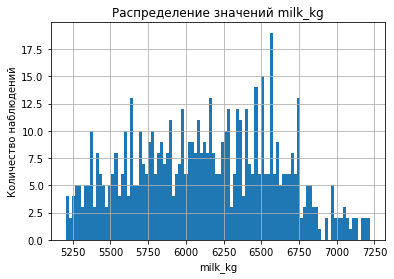

'Распределение milk_kg не относится к нормальному'

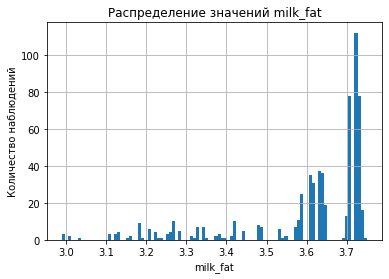

'Распределение milk_fat не относится к нормальному'

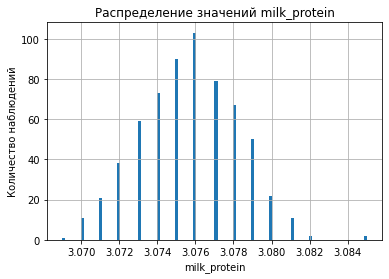

'Распределение milk_protein не относится к нормальному'

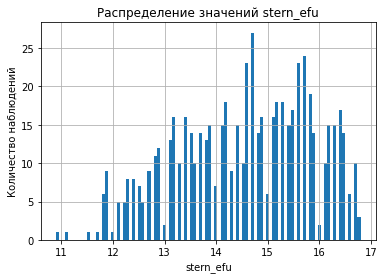

'Распределение stern_efu не относится к нормальному'

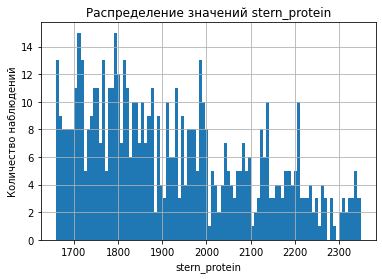

'Распределение stern_protein не относится к нормальному'

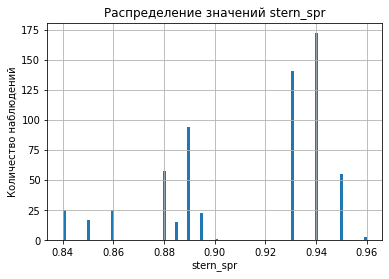

'Распределение stern_spr не относится к нормальному'

In [36]:
for i in range(len(numeric_columns_m)):
    plt.hist(ferma_main[numeric_columns_m[i]], bins=100)
    plt.title(f'Распределение значений {numeric_columns_m[i]}')
    plt.xlabel(numeric_columns_m[i])
    plt.ylabel('Количество наблюдений')
    plt.grid()
    plt.show()
    val = st.shapiro(ferma_main[numeric_columns_m[i]]).pvalue
    if val < 0.05:
        display(f'Распределение {numeric_columns_m[i]} не относится к нормальному')
    else:
        display(f'Распределение {numeric_columns_m[i]} относится к нормальному')

**Визуализация качественных значений**

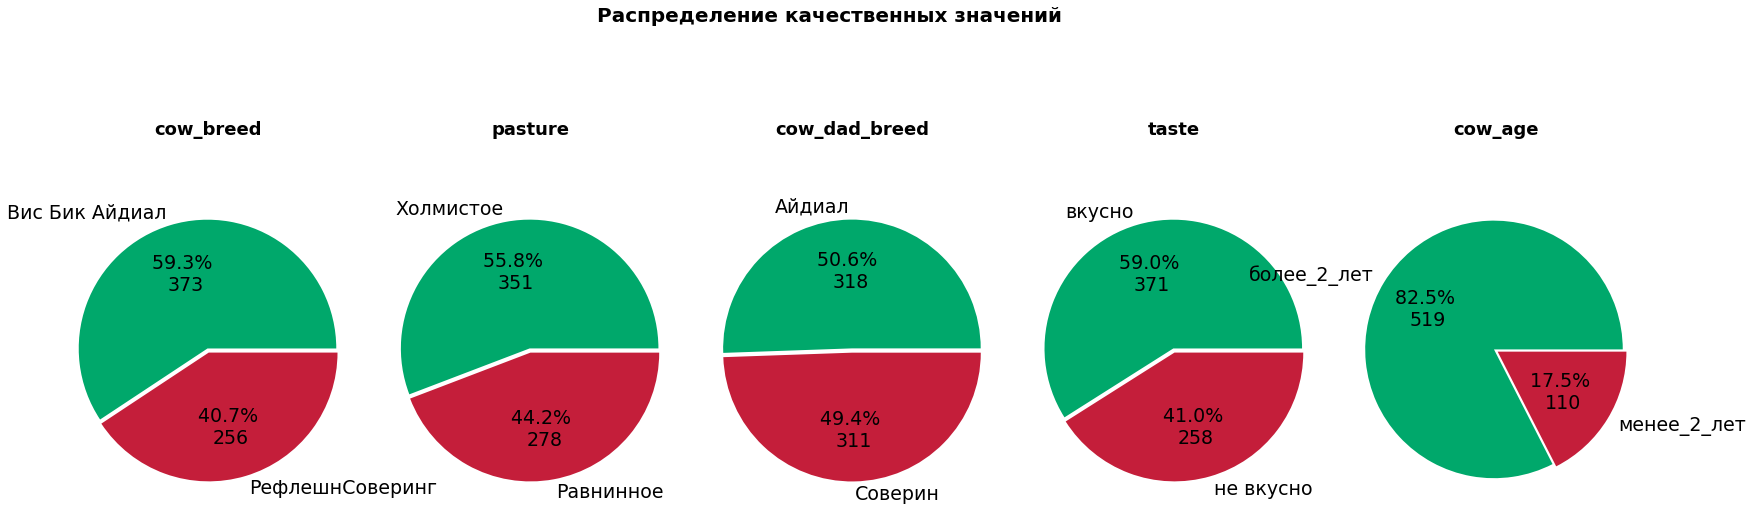

In [37]:
def percent(pct, table):
    absolute = int(round(pct/100 * table.sum()))
    return f"{pct:.1f}% \n{absolute}"

qual_columns_ms = [name for name in qual_columns_m if name != 'cow_dad_name']

fig, ax = plt.subplots(1, 5, figsize=(25, 10))
fig.suptitle('Распределение качественных значений', size=20, weight='bold')
i = 0
colors = ['#00A86B', '#C41E3A']
plt.subplots_adjust(wspace=2)
for column in qual_columns_ms:
    table = ferma_main[column].value_counts()
    wedges, texts, autotexts = ax[i].pie(table, autopct=lambda pct: percent(pct, table), colors=colors,
                                  radius=3, labels=table.index, explode=[0.05 for i in range(2)])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    ax[i].set_title(f'{column}', y=2.5, pad=1, fontsize=18, weight='bold')
    i += 1
    
plt.show()

#### Визуализация данных датафрейма `cow_buy`

**Визуализация количественных значений**

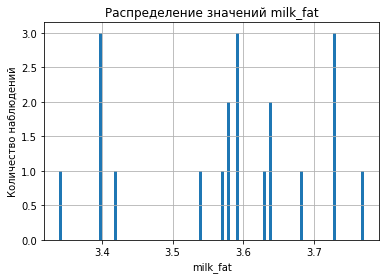

'Распределение milk_fat относится к нормальному'

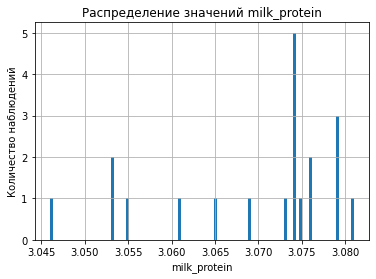

'Распределение milk_protein не относится к нормальному'

In [38]:
for i in range(len(numeric_columns_c)):
    plt.hist(cow_buy[numeric_columns_c[i]], bins=100)
    plt.title(f'Распределение значений {numeric_columns_c[i]}')
    plt.xlabel(numeric_columns_c[i])
    plt.ylabel('Количество наблюдений')
    plt.grid()
    plt.show()
    val = st.shapiro(cow_buy[numeric_columns_c[i]]).pvalue
    if val < 0.05:
        display(f'Распределение {numeric_columns_c[i]} не относится к нормальному')
    else:
        display(f'Распределение {numeric_columns_c[i]} относится к нормальному')

**Визуализация качественных значений**

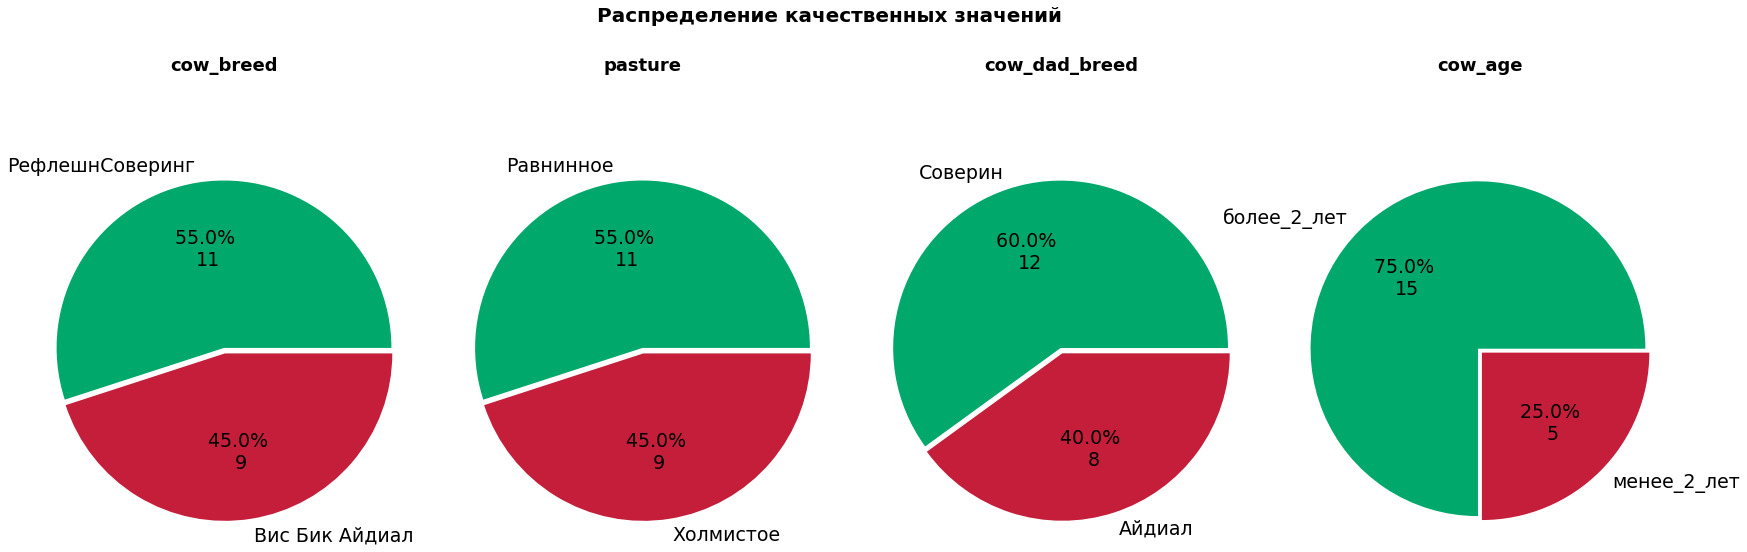

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(25, 10))
fig.suptitle('Распределение качественных значений', size=20, weight='bold')
i = 0
colors = ['#00A86B', '#C41E3A']
plt.subplots_adjust(wspace=2)
for column in qual_columns_c:
    table = cow_buy[column].value_counts()
    wedges, texts, autotexts = ax[i].pie(table, autopct=lambda pct: percent(pct, table), colors=colors,
                                  radius=3, labels=table.index, explode=[0.05 for i in range(2)])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    ax[i].set_title(f'{column}', y=2.5, pad=1, fontsize=18, weight='bold')
    i += 1
    
plt.show()

### Вывод по разделу 

При статистическом анализе данных в датафрейме `ferma_main` были обнаружено следующее:
- В данных столбцоа `milk_kg` было обнаружен и изменен критический выброс;
- Среднее значение удоя - 6188 кг, жирности молока - 3.6 %, процента белка в молоке - 3.07 %;
- Распределение качественных показателей находятся в диапозоне 40 на 60 - 50 на 50 (кроме возраста коровы).

При статистическом анализе данных в датафрейме `cow_buy` были обнаружено следующее:
- Среднее значение жирности молока - 3.57 %, процента белка в молоке - 3.07 %;
- Распределение качественных показателей находятся в диапозоне 40 на 60 - 45 на 65 (кроме возраста коровы).

Во всех количественных признаках наблюдается **ненормальное распределение**.

Молоко из `ferma_main` не отличается от молока из `cow_buy` по проценту жирности.

Молоко из `ferma_main` отличается от молока из `cow_buy` по проценту содержания белков

## Корреляционный анализ

### Определение корреляции между признаками 

#### Опеределение корреляции между количественными признаками

interval columns not set, guessing: ['milk_kg', 'milk_fat', 'milk_protein', 'stern_efu', 'stern_protein', 'stern_spr']


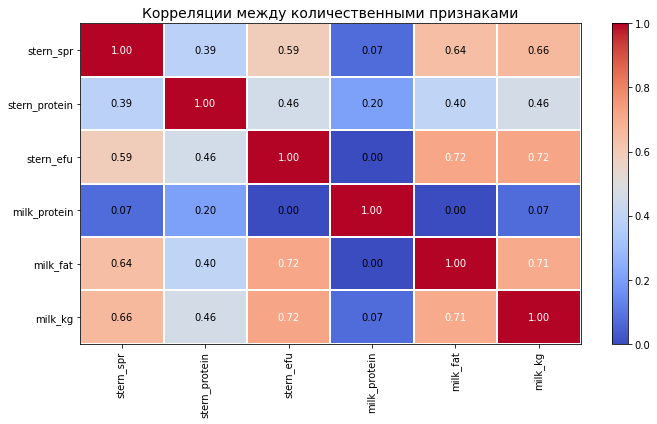

In [40]:
correlation_matrix = ferma_main[numeric_columns_m].phik_matrix()

plot_correlation_matrix(correlation_matrix.values, 
                        x_labels=correlation_matrix.columns, 
                        y_labels=correlation_matrix.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title='Корреляции между количественными признаками', 
                        fontsize_factor=1, 
                        figsize=(10, 6))
plt.tight_layout()

#### Определение корреляции между качественными признаками

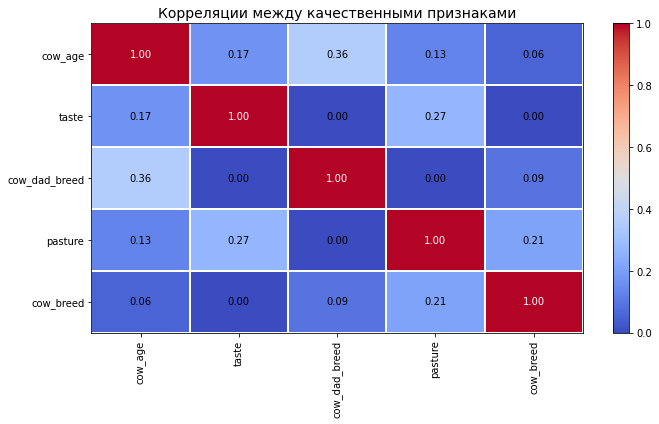

In [41]:
phik_main = ferma_main[qual_columns_m].phik_matrix()

plot_correlation_matrix(phik_main.values, 
                        x_labels=phik_main.columns, 
                        y_labels=phik_main.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title='Корреляции между качественными признаками', 
                        fontsize_factor=1, 
                        figsize=(10, 6))
plt.tight_layout()

### Построение диаграмм рассеивания и графиков "ящик с усами" по признакам

#### Построение диаграмм рассеивания

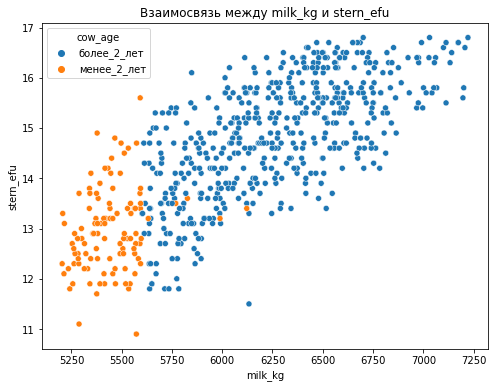

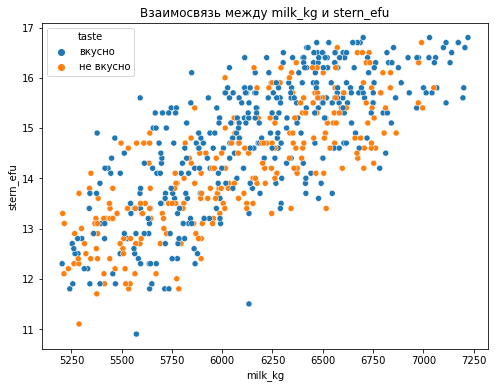

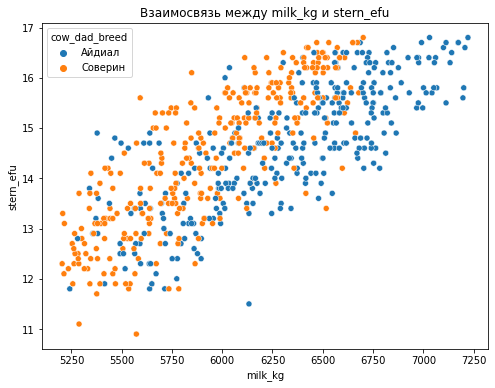

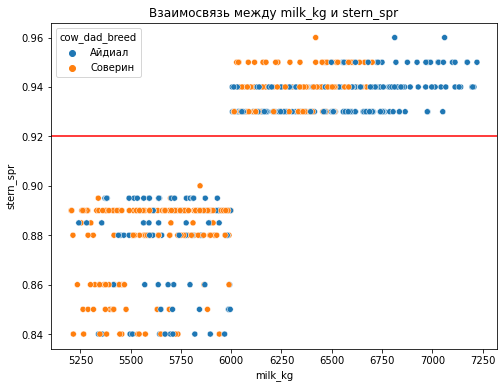

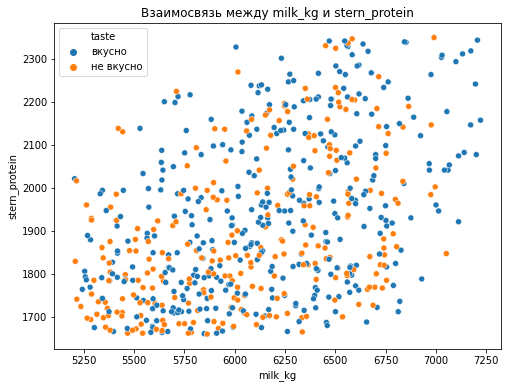

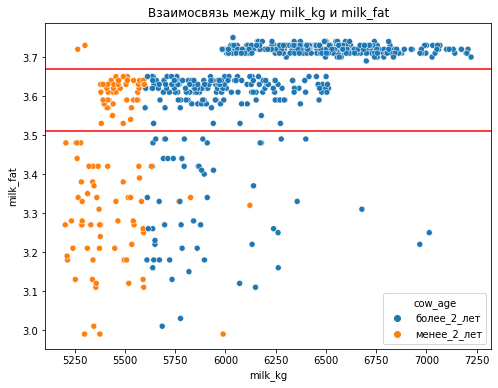

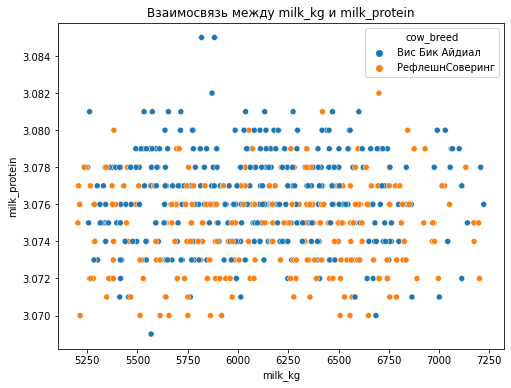

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='stern_efu', hue='cow_age', alpha=1)
plt.title('Взаимосвязь между milk_kg и stern_efu')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='stern_efu', hue='taste', alpha=1)
plt.title('Взаимосвязь между milk_kg и stern_efu')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='stern_efu', hue='cow_dad_breed', alpha=1)
plt.title('Взаимосвязь между milk_kg и stern_efu')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='stern_spr', hue='cow_dad_breed', alpha=1)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.title('Взаимосвязь между milk_kg и stern_spr')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='stern_protein', hue='taste', alpha=1)
plt.title('Взаимосвязь между milk_kg и stern_protein')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='milk_fat', hue='cow_age', alpha=1)
plt.axhline(y=3.67, color='r', linestyle='-')
plt.axhline(y=3.51, color='r', linestyle='-')
plt.title('Взаимосвязь между milk_kg и milk_fat')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ferma_main, x='milk_kg', y='milk_protein', hue='cow_breed', alpha=1)
plt.title('Взаимосвязь между milk_kg и milk_protein')
plt.show()

#### Построение графиков "ящик с усами"

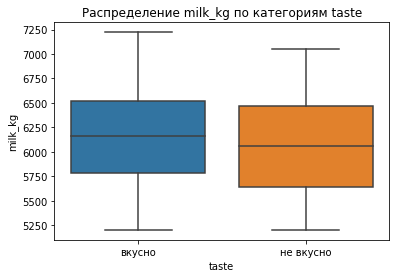

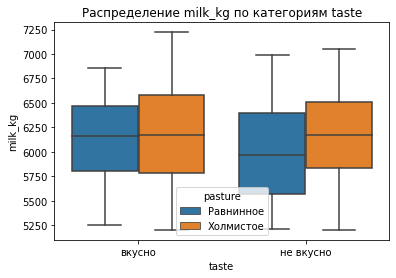

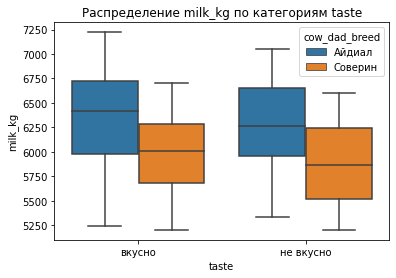

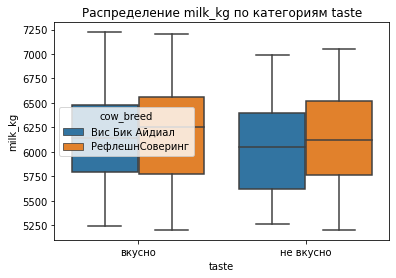

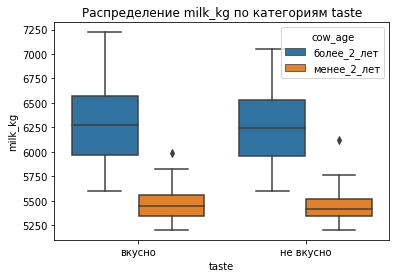

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=ferma_main, x='taste', y='milk_kg')
plt.title('Распределение milk_kg по категориям taste')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=ferma_main, x='taste', y='milk_kg', hue='pasture')
plt.title('Распределение milk_kg по категориям taste')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=ferma_main, x='taste', y='milk_kg', hue='cow_dad_breed')
plt.title('Распределение milk_kg по категориям taste')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=ferma_main, x='taste', y='milk_kg', hue='cow_breed')
plt.title('Распределение milk_kg по категориям taste')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=ferma_main, x='taste', y='milk_kg', hue='cow_age')
plt.title('Распределение milk_kg по категориям taste')
plt.show()

### Вывод по разделу

В процессе проведения корреляционного анализа была обнаружена **взаимосвязь** следующих признаков:
- Высокая прямая линейная корреляция (0,72) целевого признака `milk_kg` и входного признака `stern_efu`;
- Высокая прямая нелинейная корреляция (0,71) целевого признака `milk_kg` и входного признака `milk_fat`;
- Заметная прямая нелинейная корреляция (0,66) целевого признака `milk_kg` и входного признака `stern_spr`;
- Умереная прямая линейная корреляция (0,46) целевого признака `milk_kg` и входного признака `stern_protein`;
- Слабая корреляция (0,27) целевого признака `taste` и входного признака `pasture`.

Для учета имеющихся нелинейных связей между целевым признаком и входными признаками предлагается провести **классификацию** входных признаков по характерным интервальным значениям.

**Мультиколлинеарность** между входными признаками не наблюдается.

## Обучение модели линейной регрессии

### Модель прогнозирования удоя коров

#### Подготовка тренировочной и тестовой выборки

Определим функцию для проведения подготовки данных для модели

In [44]:
def preprocessing_data(X, y):
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['category', 'object']).columns
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]))
    X_train_encoded.columns = encoder.get_feature_names(categorical_features)
    X_train_ohe = pd.concat([X_train[numeric_features], X_train_encoded], axis=1)
    
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))
    X_test_encoded.columns = encoder.get_feature_names(categorical_features)
    X_test_ohe = pd.concat([X_test[numeric_features], X_test_encoded], axis=1)
    
    scaler_standard = StandardScaler()
    X_train_standard = X_train_ohe.copy()
    X_train_standard[X_train_ohe.columns] = scaler_standard.fit_transform(X_train_ohe)
    
    X_test_standard = X_test_ohe.copy()
    X_test_standard[X_test_ohe.columns] = scaler_standard.transform(X_test_ohe)
    
    return X_train_standard, X_test_standard, y_train, y_test

In [45]:
y_1 = ferma_main['milk_kg']
X_1 = ferma_main.drop(columns=['milk_kg', 'taste', 'milk_fat', 'milk_protein'])

#### Предобработка данных выборок

In [46]:
X_train_1, X_test_1, y_train_1, y_test_1 = preprocessing_data(X_1, y_1)
X_train_1.columns = ['stern_efu', 'stern_protein', 'stern_spr', 'cow_breed_rs', 
                     'pasture_hill', 'cow_dad_breed_soverin', 'cow_age_min2y']
display(X_train_1.head())

,stern_efu,stern_protein,stern_spr,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y
0,0.016344,0.248479,0.814135,-0.833213,-1.174218,-0.97277,-0.431738
1,0.095707,-1.392310,-1.072496,-0.833213,-1.174218,-0.97277,-0.431738
2,0.016344,1.124306,0.499697,-0.833213,0.851631,-0.97277,-0.431738
3,-1.174092,0.858232,-0.758057,-0.833213,-1.174218,-0.97277,-0.431738
4,0.571881,-0.671693,0.499697,1.200173,0.851631,-0.97277,-0.431738


#### Обучение модели линейной регрессии 

Проведем обучение модели на тренировочных данных и предсказание на тестовых данных

In [47]:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)

Для дальнейшего анализа создадим сравнительную таблицу с указанием весов модели, включая свободный параметр

In [48]:
table_1 = pd.DataFrame(model_1.coef_, columns=['model_1'])
table_1 = table_1.T
table_1.columns = X_train_1.columns
table_1['intercept'] = model_1.intercept_
display(table_1)

,stern_efu,stern_protein,stern_spr,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y,intercept
model_1,139.390725,41.341125,177.011606,15.362444,28.90716,-117.017581,-77.822121,6139.212314


#### Оценка качества модели

Определим функции для визуализации графика остатков и основных метрик модели

In [49]:
def show_quality(y_test, y_prediction): 
    residuals = y_test - y_prediction

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=residuals, alpha=1)
    plt.title('График распределения остатков')
    plt.xlabel('Удой, кг')
    plt.ylabel('Остатки')
    plt.grid()
    plt.show()
    
def table_quality(y_test, y_prediction):
    mse = round(mean_squared_error(y_test, y_prediction), 3)
    rmse = round(mean_squared_error(y_test, y_prediction, squared=False), 3)
    r_2 = round(r2_score(y_test, y_prediction), 2)
    mae = round(mean_absolute_error(y_test, y_prediction), 3)
    d = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2': r_2}
    table = pd.DataFrame(data=d, index=[0])
    return table

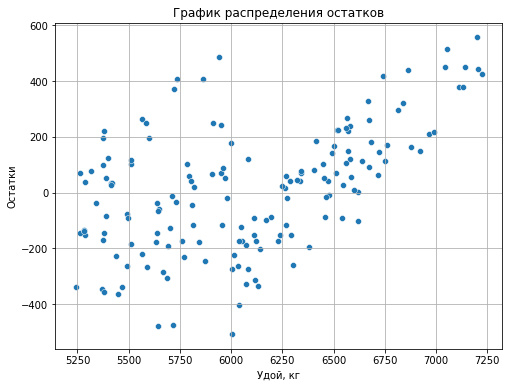

,MSE,RMSE,MAE,R^2
0,49615.049,222.744,181.039,0.82


In [50]:
show_quality(y_test_1, y_pred_1)
table_qual_1 = table_quality(y_test_1, y_pred_1)
display(table_qual_1)

#### Выводы по обучению модели

Обученная на необработанных данных модель показала хорошие результаты - **коэффициент детерминации 0,82**.

При анализе графика остатков можно отметить следующее:
- Распределение остатков в интервале удоя 5 250 - 6 000 гомоскедастично;
- Распределение остатков в интервале удоя 6 000 - 6 250 показывает, что модель на данном интервале занижает предсказания для удоя;
- Распределение остатков в интервале удоя 6 25 - 7 250 показывает, что модель на данном интервале завышает предсказания для удоя

### Модель прогнозирования удоя коров с измененными входными данными

#### Подготовка входных данных

Определим функции для классификации количественных входных признаков, имеющих нелинейную корреляцию с целевым признаком

In [51]:
def spr_binary(x):
    if x > 0.92:
        return 1
    return 0

Проведем классификацию количественных входных признаков, имеющих нелинейную корреляцию с целевым признаком, и возведем в квадрта входной признак, имеющий линейную корреляцию с целевым признаком

In [52]:
X_2 = X_1.copy()
y_2 = y_1.copy()

X_2['stern_spr_bin'] = X_2['stern_spr'].apply(lambda x: spr_binary(x))
X_2['stern_efu_2'] = X_2['stern_efu'] ** 2 
X_2 = X_2.drop(columns=['stern_efu', 'stern_spr'])
display(X_2.head())

,stern_protein,cow_breed,pasture,cow_dad_breed,cow_age,stern_spr_bin,stern_efu_2
1,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
2,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
3,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
4,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
5,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


#### Подготовка тренировочной и тестовой выборки

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = preprocessing_data(X_2, y_2)
X_train_2.columns = ['stern_protein', 'stern_spr_bin', 'stern_efu_2', 'cow_breed_rs', 
                     'pasture_hill', 'cow_dad_breed_soverin', 'cow_age_min2y']
display(X_train_2.head())

,stern_protein,stern_spr_bin,stern_efu_2,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y
0,0.248479,0.807856,-0.027210,-0.833213,-1.174218,-0.97277,-0.431738
1,-1.392310,-1.237844,0.053583,-0.833213,-1.174218,-0.97277,-0.431738
2,1.124306,0.807856,-0.027210,-0.833213,0.851631,-0.97277,-0.431738
3,0.858232,-1.237844,-1.172927,-0.833213,-1.174218,-0.97277,-0.431738
4,-0.671693,0.807856,0.549923,1.200173,0.851631,-0.97277,-0.431738


#### Обучение модели линейной регрессии 

Проведем обучение модели на тренировочных данных и предсказание на тестовых данных

In [54]:
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

Для дальнейшего анализа добавим в сравнительную таблицу веса модели

In [55]:
table_2 = pd.DataFrame(model_2.coef_, columns=['model_2'])
table_2 = table_2.T
table_2.columns = X_train_2.columns
table_2['intercept'] = model_2.intercept_
table_12 = pd.concat([table_1, table_2], sort=False)
display(table_12)

,stern_efu,stern_protein,stern_spr,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y,intercept,stern_spr_bin,stern_efu_2
model_1,139.390725,41.341125,177.011606,15.362444,28.907160,-117.017581,-77.822121,6139.212314,NaN,NaN
model_2,NaN,41.242037,NaN,16.157247,19.329265,-100.466612,-81.742283,6139.212314,196.65231,134.794639


#### Оценка качества модели

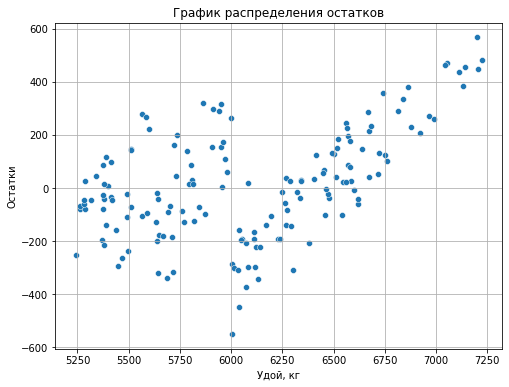

,MSE,RMSE,MAE,R^2
0,42834.416,206.965,163.893,0.84


In [56]:
show_quality(y_test_2, y_pred_2)
table_qual_2 = table_quality(y_test_2, y_pred_2)
display(table_qual_2)

#### Выводы по обучению модели

Обученная на обработанных данных модель показала результаты лучше, чем первая модель - **коэффициент детерминации 0,84**.

При анализе графика остатков можно отметить следующее:
- Распределение остатков в интервале удоя 5 250 - 6 000 гомоскедастично;
- Распределение остатков в интервале удоя 6 000 - 6 250 показывает, что модель на данном интервале занижает предсказания для удоя;
- Распределение остатков в интервале удоя 6 250 - 7 250 показывает, что модель на данном интервале завышает предсказания для удоя

### Модель прогнозирования удоя коров с новым признаком 

#### Подготовка входных данных

Добавим в датафрейм `ferma_main` новые признаки из датафрейма `cow_dad`

In [57]:
ferma_3 = ferma_dad.join(ferma_main, on='cow_id')
ferma_3 = ferma_3.drop(columns='cow_id')
display(ferma_3.head())

,cow_dad_name,milk_kg,stern_efu,stern_protein,stern_spr,cow_breed,pasture,cow_dad_breed,milk_fat,milk_protein,taste,cow_age
0,Буйный,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,Соловчик,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,Барин,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,Буйный,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,Барин,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Проведем те же операции по обработке данных, что и при обучении второй модели

In [58]:
y_3 = ferma_3['milk_kg']
X_3 = ferma_3.drop(columns=['milk_kg', 'taste', 'milk_fat', 'milk_protein'])


X_3['stern_spr_bin'] = X_3['stern_spr'].apply(lambda x: spr_binary(x))
X_3['stern_efu_2'] = X_3['stern_efu'] ** 2 
X_3 = X_3.drop(columns=['stern_efu', 'stern_spr'])
display(X_3.head())

,cow_dad_name,stern_protein,cow_breed,pasture,cow_dad_breed,cow_age,stern_spr_bin,stern_efu_2
0,Буйный,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,Соловчик,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,Барин,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,Буйный,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,Барин,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


#### Подготовка тренировочной и тестовой выборки

In [59]:
numeric_features = X_3.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_3.select_dtypes(include=['category', 'object']).columns
    
X_train_3_, X_test_3_, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.25, random_state=42)
X_train_3_ = X_train_3_.reset_index(drop=True)
y_train_3 = y_train_3.reset_index(drop=True)

X_test_3_ = X_test_3_.reset_index(drop=True)
y_test_3 = y_test_3.reset_index(drop=True)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_3_[categorical_features]))
X_train_encoded.columns = encoder.get_feature_names(categorical_features)
X_train_ohe = pd.concat([X_train_3_[numeric_features], X_train_encoded], axis=1)

X_test_encoded = pd.DataFrame(encoder.transform(X_test_3_[categorical_features]))
X_test_encoded.columns = encoder.get_feature_names(categorical_features)
X_test_ohe = pd.concat([X_test_3_[numeric_features], X_test_encoded], axis=1)

scaler_standard = StandardScaler()
X_train_3 = X_train_ohe.copy()
X_train_3[X_train_ohe.columns] = scaler_standard.fit_transform(X_train_ohe)

X_test_3 = X_test_ohe.copy()
X_test_3[X_test_ohe.columns] = scaler_standard.transform(X_test_ohe)

In [60]:
X_train_3.columns = ['stern_protein', 'stern_spr_bin', 'stern_efu_2',
                     'cow_dad_buiniy', 'cow_dad_hercules', 'cow_dad_solovchik', 
                     'cow_breed_rs', 'pasture_hill', 'cow_dad_breed_soverin', 
                     'cow_age_min2y']
display(X_train_3.head())

,stern_protein,stern_spr_bin,stern_efu_2,cow_dad_buiniy,cow_dad_hercules,cow_dad_solovchik,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y
0,0.248479,0.807856,-0.027210,1.349207,-0.340755,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738
1,-1.392310,-1.237844,0.053583,1.349207,-0.340755,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738
2,1.124306,0.807856,-0.027210,1.349207,-0.340755,-0.445503,-0.833213,0.851631,-0.97277,-0.431738
3,0.858232,-1.237844,-1.172927,-0.741176,2.934663,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738
4,-0.671693,0.807856,0.549923,1.349207,-0.340755,-0.445503,1.200173,0.851631,-0.97277,-0.431738


#### Обучение модели линейной регрессии 

Проведем обучение модели на тренировочных данных и предсказание на тестовых данных

In [61]:
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)

Для дальнейшего анализа добавим в сравнительную таблицу веса модели

In [62]:
table_3 = pd.DataFrame(model_3.coef_, columns=['model_3'])
table_3 = table_3.T
table_3.columns = X_train_3.columns
table_3['intercept'] = model_3.intercept_
table_weight = pd.concat([table_12, table_3], sort=False)
display(table_weight)

,stern_efu,stern_protein,stern_spr,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y,intercept,stern_spr_bin,stern_efu_2,cow_dad_buiniy,cow_dad_hercules,cow_dad_solovchik
model_1,139.390725,41.341125,177.011606,15.362444,28.907160,-117.017581,-77.822121,6139.212314,NaN,NaN,NaN,NaN,NaN
model_2,NaN,41.242037,NaN,16.157247,19.329265,-100.466612,-81.742283,6139.212314,196.652310,134.794639,NaN,NaN,NaN
model_3,NaN,40.672700,NaN,22.437521,25.986144,2.875545,-75.756197,6139.212314,183.078165,143.040477,124.361527,79.622908,19.921483


#### Оценка качества модели

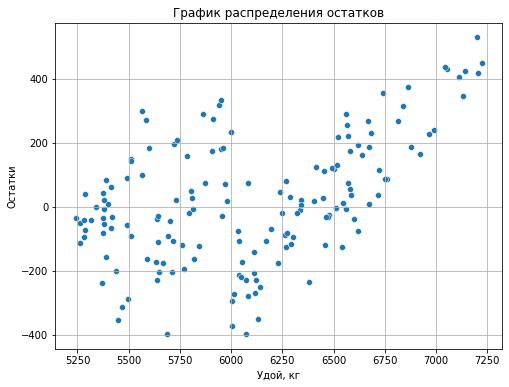

,MSE,RMSE,MAE,R^2
0,37651.407,194.04,153.403,0.86


In [63]:
show_quality(y_test_3, y_pred_3)
table_qual_3 = table_quality(y_test_3, y_pred_3)
display(table_qual_3)

#### Выводы по обучению модели

Обученная на дополненных и обработанных данных модель показала наилучшие результаты по сравнению с остальными моделями - **коэффициент детерминации 0,86**.

При анализе графика остатков можно отметить следующее:
- Распределение остатков в интервале удоя 5 250 - 6 000 гомоскедастично;
- Распределение остатков в интервале удоя 6 000 - 6 250 показывает, что модель на данном интервале занижает предсказания для удоя;
- Распределение остатков в интервале удоя 6 250 - 7 250 показывает, что модель на данном интервале завышает предсказания для удоя

### Сравнение качеств разработанных моделей

Проведем анализ ранее сформированных метрик моделей

In [64]:
table_metrics = pd.concat([table_qual_1, table_qual_2, table_qual_3], sort=False)
table_metrics.index = ['model_1', 'model_2', 'model_3']
display(table_metrics)

,MSE,RMSE,MAE,R^2
model_1,49615.049,222.744,181.039,0.82
model_2,42834.416,206.965,163.893,0.84
model_3,37651.407,194.040,153.403,0.86


**С каждой итерацией (внесением изменений в данные) качество модели улучшалось по всем 4 метрикам. Наилучших результатов модель достигла при дополненных и обработанных данных.**

### Оценка качеств моделей

Для дальнейшего прогнозирования примем лучшую модель - **model_3**.

Рассчитаем квантили ошибки модели для возможности определения доверительного интервала прогноза.

In [65]:
y_train_pred = model_3.predict(X_train_3)
residuals_ = y_train_3 - y_train_pred
residuals = pd.DataFrame(residuals_)
residuals.describe()

,milk_kg
count,4.710000e+02
mean,1.158592e-13
std,1.827930e+02
min,-6.643994e+02
25%,-1.341523e+02
50%,3.210119e+00
75%,1.064115e+02
max,5.235713e+02


In [66]:
lower_quantile = np.quantile(residuals, 0.025)
upper_quantile = np.quantile(residuals, 0.975)

display(f'Доверительный интервал прогноза: [{lower_quantile}, {upper_quantile}]')

'Доверительный интервал прогноза: [-360.6975495448562, 367.4235774181823]'

### Прогнозирование удоя коров на тестовых данных

Добавим в датафрейм для прогноза (`cow_buy`) недостающию данные

In [67]:
cow_pred = cow_buy.copy()
dif_col = ['stern_efu', 'stern_protein', 'stern_spr']
for column in dif_col:
    cow_pred[column] = ferma_main[column].mean() * 1.05
cow_pred = cow_pred.drop(columns=['milk_fat', 'milk_protein'])
display(cow_pred.head())

,cow_breed,pasture,cow_dad_breed,cow_dad_name,cow_age,stern_efu,stern_protein,stern_spr
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,15.271073,2019.532273,0.958772
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,15.271073,2019.532273,0.958772
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,15.271073,2019.532273,0.958772
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,15.271073,2019.532273,0.958772
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,15.271073,2019.532273,0.958772


In [68]:
cow_pred['stern_spr_bin'] = cow_pred['stern_spr'].apply(lambda x: spr_binary(x))
cow_pred['stern_efu_2'] = cow_pred['stern_efu'] ** 2 
cow_pred = cow_pred.drop(columns=['stern_efu', 'stern_spr'])

Для корректной подготовки данных приведем датафрейм к виду `X_train_3`

In [69]:
id_ = [0 for x in range(20)]
cow_milk_pred = pd.DataFrame(data=id_)
cow_milk_pred.columns = ['f']
for column in X_3:
    cow_milk_pred = pd.concat([cow_milk_pred, cow_pred[column]], axis=1)
cow_milk_pred = cow_milk_pred.drop(columns=['f'])

Проведем подготовку данных по образцу для model_3

In [70]:
numeric_features = cow_milk_pred.select_dtypes(include=['float64', 'int64']).columns
categorical_features = cow_milk_pred.select_dtypes(include=['category', 'object']).columns

cow_buy_enc = pd.DataFrame(encoder.transform(cow_milk_pred[categorical_features]))
cow_buy_enc.columns = encoder.get_feature_names(categorical_features)
cow_buy_ohe = pd.concat([cow_milk_pred[numeric_features], cow_buy_enc], axis=1)

cow_buy_res = cow_buy_ohe.copy()
cow_buy_res[cow_buy_ohe.columns] = scaler_standard.transform(cow_buy_ohe)

In [71]:
cow_buy_res.columns = ['stern_protein', 'stern_spr_bin', 'stern_efu_2',
                       'cow_dad_buiniy', 'cow_dad_hercules', 'cow_dad_solovchik',
                       'cow_breed_rs', 'pasture_hill', 'cow_dad_breed_soverin', 
                       'cow_age_min2y']

Проведем прогноз удоя коров подготовленного датафрейма

In [72]:
cow_milk = model_3.predict(cow_buy_res)
display(cow_milk)

array([6550.19895698, 6294.29851976, 6288.13413792, 6594.98807915,
       6542.34408628, 6340.75768495, 6550.19895698, 6502.47322485,
       6288.13413792, 6386.81337406, 6348.74586759, 6548.93239004,
       6550.19895698, 6086.97928202, 6288.13413792, 6594.98807915,
       6348.74586759, 6340.75768495, 6502.47322485, 6542.34408628])

### Выводы по разделу

Для прогнозирования удоя коров датафрейма `cow_buy` были выполнены следующие шаги:
- Подготовлены 3 модели линейной регрессии с различным объемом и видом входных данных;
- Расчитаны метрики каждой модели и определена лучшая модель для дальнейшей работы;
- Дополнены и подготовлены входные данные для прогнозирования удоя коров датафрейма `cow_buy`.

## Обучение модели логистической регрессии

### Подготовка данных и обучение модели логистической регрессии

Определим функцию для кодирования целевого категориального признака `taste`

In [73]:
def tasty(x):
    if x == 'вкусно':
        return 1
    return 0

y_log = ferma_3['taste'].apply(lambda x: tasty(x))
X_log = ferma_3.drop(columns=['taste'])

Подготовим входные данные для модели

In [74]:
def fat_class(x):
    if x > 3.67:
        return '3.67_m'
    elif x > 3.51:
        return '3.51_3.67'
    return 'm_3.51'

In [75]:
X_log['stern_spr_bin'] = X_log['stern_spr'].apply(lambda x: spr_binary(x))
X_log['milk_fat_class'] = X_log['milk_fat'].apply(lambda x: fat_class(x))
X_log['stern_efu_2'] = X_log['stern_efu'] ** 2 
X_log = X_log.drop(columns=['stern_efu', 'stern_spr', 'milk_fat', 'milk_kg'])

In [89]:
numeric_features = X_log.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_log.select_dtypes(include=['category', 'object']).columns
    
X_train_log_, X_test_log_, y_train_log, y_test_log = train_test_split(X_log, y_log, 
                                                                      test_size=0.25, random_state=42)
X_train_log_ = X_train_log_.reset_index(drop=True)
y_train_log = y_train_log.reset_index(drop=True)

X_test_log_ = X_test_log_.reset_index(drop=True)
y_test_log = y_test_log.reset_index(drop=True)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_log_[categorical_features]))
X_train_encoded.columns = encoder.get_feature_names(categorical_features)
X_train_ohe = pd.concat([X_train_log_[numeric_features], X_train_encoded], axis=1)

X_test_encoded = pd.DataFrame(encoder.transform(X_test_log_[categorical_features]))
X_test_encoded.columns = encoder.get_feature_names(categorical_features)
X_test_ohe = pd.concat([X_test_log_[numeric_features], X_test_encoded], axis=1)

scaler_standard = StandardScaler()
X_train_log = X_train_ohe.copy()
X_train_log[X_train_ohe.columns] = scaler_standard.fit_transform(X_train_ohe)

X_test_log = X_test_ohe.copy()
X_test_log[X_test_ohe.columns] = scaler_standard.transform(X_test_ohe)

In [90]:
X_train_log.columns = ['stern_protein', 'milk_protein', 'stern_spr_bin', 'stern_efu_2',
                     'cow_dad_buiniy', 'cow_dad_hercules', 'cow_dad_solovchik', 
                     'cow_breed_rs', 'pasture_hill', 'cow_dad_breed_soverin', 
                     'cow_age_min2y', 'milk_fat_3_67m', 'milk_fat_m_3_51']
display(X_train_log.head())

,stern_protein,milk_protein,stern_spr_bin,stern_efu_2,cow_dad_buiniy,cow_dad_hercules,cow_dad_solovchik,cow_breed_rs,pasture_hill,cow_dad_breed_soverin,cow_age_min2y,milk_fat_3_67m,milk_fat_m_3_51
0,0.248479,1.666305,0.807856,-0.027210,1.349207,-0.340755,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738,-0.940213,-0.472627
1,-1.392310,1.283462,-1.237844,0.053583,1.349207,-0.340755,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738,-0.940213,2.115832
2,1.124306,0.517774,0.807856,-0.027210,1.349207,-0.340755,-0.445503,-0.833213,0.851631,-0.97277,-0.431738,-0.940213,-0.472627
3,0.858232,0.134930,-1.237844,-1.172927,-0.741176,2.934663,-0.445503,-0.833213,-1.174218,-0.97277,-0.431738,-0.940213,-0.472627
4,-0.671693,-2.162133,0.807856,0.549923,1.349207,-0.340755,-0.445503,1.200173,0.851631,-0.97277,-0.431738,1.063589,-0.472627


Проведем обучение модели на тренировочных данных и предсказание на тестовых данных

In [92]:
model_log = LogisticRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

Расчитаем метрики логистической модели

In [93]:
display(f'Accuracy: {accuracy_score(y_test_log, y_pred_log):.4f}')
display(f'Precision: {precision_score(y_test_log, y_pred_log):.4f}')
display(f'Recall: {recall_score(y_test_log, y_pred_log):.4f}')

'Accuracy: 0.6392'

'Precision: 0.6887'

'Recall: 0.7526'

In [95]:
display('Матрица ошибок')
confusion_matrix(y_test_log, y_pred_log)

'Матрица ошибок'

array([[28, 33],
       [24, 73]])

### Анализ модели логистической регрессии

Для заказчика главное - вкусное молоко. Таким образом, нам важно снизить ошибки второго рода (уменьшить количество `false positive` и увеличить `precision`)

In [96]:
y_probs = model_log.predict_proba(X_test_log)[:, 1]
probs = pd.DataFrame(zip(y_probs, y_test_log))
probs.columns = ['proba', 'true']
probs_0 = probs[probs['true'] == 0].sort_values(by='proba', ascending=False)
probs_1 = probs[probs['true'] == 1].sort_values(by='proba', ascending=False)
display(probs_0.head())
display(probs_1.head(14))

,proba,true
135,0.855605,0
116,0.816833,0
108,0.802279,0
92,0.798120,0
111,0.782430,0


,proba,true
56,0.903692,1
85,0.876636,1
77,0.876232,1
17,0.865563,1
65,0.862053,1
50,0.838300,1
5,0.835775,1
61,0.828530,1
150,0.824365,1
105,0.821155,1


Зададим порог прогнозирования, исходя из обозначенного критерия, равным `0.856`

In [97]:
y_pred_threshold = (y_probs >= 0.817).astype(int)

Расчитаем метрики модели с учетом указанного порога

In [98]:
display(f'Accuracy: {accuracy_score(y_test_log, y_pred_threshold):.4f}')
display(f'Precision: {precision_score(y_test_log, y_pred_threshold):.4f}')
display(f'Recall: {recall_score(y_test_log, y_pred_threshold):.4f}')

'Accuracy: 0.4494'

'Precision: 0.9167'

'Recall: 0.1134'

Accuracy модели сильно снизилась. Данная метрика говорит о том, что почти 55 % вкусного молока не было предсказано моделью. Таким образом, для улучшения модели необходимо рассмотреть возможность изменения/добавления входных данных, которые могли бы уменьшить "перемешивания" прогнозирования.

### Прогноз вкуса молока коров на тестовых данных 

Для прогнозирования вкуса молока будет использовать подготовленный датафрейм `cow_milk_pred`

In [99]:
cow_pred_log = cow_buy.copy()
dif_col = ['stern_efu', 'stern_protein', 'stern_spr']
for column in dif_col:
    cow_pred_log[column] = ferma_main[column].mean() * 1.05
display(cow_pred_log.head())

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age,stern_efu,stern_protein,stern_spr
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772


In [100]:
cow_pred_log['stern_spr_bin'] = cow_pred_log['stern_spr'].apply(lambda x: spr_binary(x))
cow_pred_log['milk_fat_class'] = cow_pred_log['milk_fat'].apply(lambda x: fat_class(x))
cow_pred_log['stern_efu_2'] = cow_pred_log['stern_efu'] ** 2 
cow_pred_log = cow_pred_log.drop(columns=['stern_efu', 'stern_spr', 'milk_fat'])

Для корректной подготовки данных приведем датафрейм к виду `X_train_log`

In [101]:
id_ = [0 for x in range(20)]
cow_ = pd.DataFrame(data=id_)
cow_.columns = ['f']
for column in X_log:
    cow_ = pd.concat([cow_, cow_pred_log[column]], axis=1)
cow_ = cow_.drop(columns=['f'])

Проведем подготовку данных по образцу для model_log

In [102]:
numeric_features = cow_.select_dtypes(include=['float64', 'int64']).columns
categorical_features = cow_.select_dtypes(include=['category', 'object']).columns

cow_buy_enc = pd.DataFrame(encoder.transform(cow_[categorical_features]))
cow_buy_enc.columns = encoder.get_feature_names(categorical_features)
cow_buy_ohe = pd.concat([cow_[numeric_features], cow_buy_enc], axis=1)

cow_log_res = cow_buy_ohe.copy()
cow_log_res[cow_buy_ohe.columns] = scaler_standard.transform(cow_buy_ohe)

In [106]:
cow_log_res.columns = ['stern_protein', 'milk_protein', 'stern_spr_bin', 'stern_efu_2',
                       'cow_dad_buiniy', 'cow_dad_hercules', 'cow_dad_solovchik',
                       'cow_breed_rs', 'pasture_hill', 'cow_dad_breed_soverin', 
                       'cow_age_min2y', 'milk_fat_class_3.67_m', 'milk_fat_class_m_3.51']

In [112]:
milk_probs = model_log.predict_proba(cow_log_res)[:, 1]
milk_taste = (milk_probs >= 0.817).astype(int)
display(milk_taste)
display(np.sort(milk_probs))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0.14673296, 0.22479805, 0.27972409, 0.30463697, 0.35449128,
       0.37967048, 0.37967048, 0.41850384, 0.43292374, 0.43292374,
       0.43292374, 0.44101156, 0.56275617, 0.58324523, 0.58394388,
       0.61763375, 0.63643107, 0.63643107, 0.65800977, 0.68939807])

## Итоговые выводы

### Обновление датафрейма `cow_buy` данными о прогнозе

In [110]:
cow_buy['milk_kg_pred'] = cow_milk
cow_buy['taste_pred'] = milk_taste
display(cow_buy.head())

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age,milk_kg_pred,taste_pred
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6550.198957,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6294.298520,0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6288.134138,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6594.988079,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.344086,0


### Отбор коров по удою и вкусу молока

Проведем отбор коров по удою и вкусу молока. Удой должен быть более 6 000 кг в год, а молоко должно быть обязательно вкусным.

In [111]:
buy_pref = cow_buy.query('milk_kg_pred > 6000 & taste_pred == 1')
display(buy_pref)
display(f'Количество коров, рекомендуемых к покупке: {buy_pref.shape[0]}')

,cow_breed,pasture,cow_dad_breed,cow_dad_name,milk_fat,milk_protein,cow_age,milk_kg_pred,taste_pred


'Количество коров, рекомендуемых к покупке: 0'

### Выводы

В процессе выполнения проекта были выполнены несколько преобразований для улучшения качества регрессионных моделей:
- Преобразование данных для снижения линейной зависимости (возведение в квадрат признака `stern_efu`);
- Преобразование данных для снижения нелинейной зависимости (классификация признаков `stern_spr`, `milk_fat`);
- Дополнение данных из других датафреймов (внесение столбца `cow_dad_name`).

Результаты регрессионных моделей можно **улучшить** с помощью **добавления дополнительных признаков** в датафрейм.

При анализе рисков или экономических расчетов в задачах классификации важны следующие **метрики**:
- Accuracy;
- Recall: при необходимости снижения ошибок первого рода (важно правильно предсказывать позитивные исходы);
- Presicion: при необходимости снижения ошибок второго рода (важно правильно предсказывать негативные исходы).